<a href="https://colab.research.google.com/github/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 21

## Today's Topics

1. Association Rule Learning
2. Apriori Algorithm
3. Recommender Systems (RS)
4. Collaborative Filtering
5. Content Based Filtering
6. Deep RS

# Association Rule Learning

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. 

When customers buy something, there is an underlying pattern that links items to items and the way they are bought. If this relationship/pattern can be uncovered then retailers can use this information for their benefit.
For example if we know items X and Y are frequently bought together then:

1. Both X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.
2. Promotional discounts could be applied to just one out of the two items.
3. Advertisements on X could be targeted at buyers who purchase Y.

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

1. Support - This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.
2. Confidence - This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.
3. Lift - This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

# Example

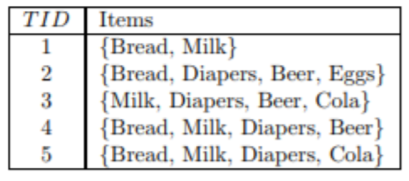



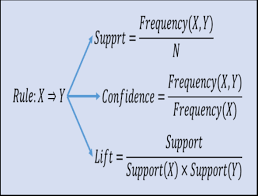

Support: If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.

Confidence: One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular X is, but not Y. If Y is also very popular in general, there will be a higher chance that a transaction containing X will also contain Y, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

Lift:  A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

[Source](https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html)

Association rules are usually required to satisfy a user-specified minimum support and a user-specified minimum confidence at the same time. Association rule generation is usually split up into two separate steps:

1. A minimum support threshold is applied to find all frequent itemsets in a database.
2. A minimum confidence constraint is applied to these frequent itemsets in order to form rules.

For point 1 above, finding all frequent itemsets can be very expensive. Although the size of the power-set grows exponentially in the number of items, efficient search is possible using the downward-closure property of support which guarantees that for a frequent itemset, all its subsets are also frequent and thus no infrequent itemset can be a subset of a frequent itemset. Exploiting this property, efficient algorithms like Apriori and Eclat can find all frequent itemsets.

# Apriori Algorithm

The apriori principle can reduce the number of itemsets we need to examine. Put simply, the apriori principle states that

if an itemset is infrequent, then all its supersets must also be infrequent

This means that if {beer} was found to be infrequent, we can expect {beer, pizza} to be equally or even more infrequent. So in consolidating the list of popular itemsets, we need not consider {beer, pizza}, nor any other itemset configuration that contains beer.

Using the apriori principle, the number of itemsets that have to be examined can be pruned, and the list of popular itemsets can be obtained in these steps:

Step 0. Start with itemsets containing just a single item, such as {apple} and {pear}.

Step 1. Determine the support for itemsets. Keep the itemsets that meet your minimum support threshold, and remove itemsets that do not.

Step 2. Using the itemsets you have kept from Step 1, generate all the possible itemset configurations.

Step 3. Repeat Steps 1 & 2 until there are no more new itemsets.

[Link to demonstrate](https://annalyzin.files.wordpress.com/2016/04/association-rules-apriori-tutorial-explanation.gif)

# Finding Item Rules with High Confidence

Finding rules with high confidence or lift is less computationally taxing once high-support itemsets have been identified, because confidence and lift values are calculated using support values.

# Drawbacks

1. Computationally Expensive. Even though the apriori algorithm reduces the number of candidate itemsets to consider, this number could still be huge when store inventories are large or when the support threshold is low. 

2. Spurious Associations. Analysis of large inventories would involve more itemset configurations, and the support threshold might have to be lowered to detect certain associations. However, lowering the support threshold might also increase the number of spurious associations detected.

# Recommender Systems (RS)

Recommender systems/Recommendation Engines are built to expose the customer to items they are not exposed to. Another goal is to deal with information overload by predicting user preferences via ratings.

RS can be designed using some very simple rules and some very complex models as well. With the amount of data growing exponentially, most of today's RS use deep learning models.

## Types of Recommender Systems

A. Collaborative Filtering: In the more general sense, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc.  The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person.

Variations on this type of recommendation system include:

1. By User Similarity: This strategy involves creating user groups by comparing users’ activities and providing recommendations that are popular among other members of the group.

2. Using Association Rule: Implementing this type of recommendation system is a matter of looking at purchasing sequences or purchasing groups, and showing similar content.

3. By Item Similarity: Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items. Item-item collaborative filtering was invented and used by Amazon.com in 1998.

[Implementation](https://colab.research.google.com/drive/1_nMN0W8GS6vRboB3unpiDX0ahCOZxhhe?usp=sharing)

Overall, CF techniques can be categorized into: memory-based CF, model-based CF, and their hybrid. Representative memory-based CF techniques are nearest neighbor-based CF such as user-based CF and item-based CF.Latent factor models such as matrix factorization are examples of model-based CF.

**Latent Factor Modeling**: Basic idea of this strategy is inferring individuals’ inherent interests by assuming that previous choices are indicative of certain tastes or hobbies. Where the previous strategy is based on explicit, manually filled catalog metadata, this strategy hinges on discovering implicit relationships. Model-based methods become more popular with its better capability in dealing with sparsity and scalability. Many model-based CF approaches can be extended with neural networks, leading to more flexible and scalable models with the computation acceleration in deep learning.

B. Content Based Filtering: Content-based systems make recommendations based on the user’s purchase or consumption history and generally become more accurate the more actions (inputs) the user takes.

Techniques used :       

Content Similarity: This strategy involves recommending content that is close based on its metadata. This approach makes sense for catalogs with a lot of rich metadata and where traffic is low compared to the number of products in the catalog.


# Recommendation Tasks

A number of recommendation tasks have been investigated in the past decades. Based on the domain of applications, there are movies recommendation, news recommendations, point-of-interest recommendation etc.

It is also possible to differentiate the tasks based on the types of feedback and input data, for example, the rating prediction task aims to predict the explicit ratings. Top- n  recommendation (item ranking) ranks all items for each user personally based on the implicit feedback. If time-stamp information is also included, we can build sequence-aware recommendation.

# Matrix Factorization

Matrix factorization is the breaking down of one matrix into a product of multiple matrices. It’s extremely well studied in mathematics, and it’s highly useful. There are many different ways to factor matrices, but singular value decomposition is particularly useful for making recommendations.

[Implementation](https://colab.research.google.com/drive/1weGDej__Q69yUFa0X4uNiyhqO853KrNY?usp=sharing)

[Reading](https://www.researchgate.net/profile/Michael-Jahrer/publication/223460749_The_BigChaos_Solution_to_the_Netflix_Grand_Prize/links/0fcfd5108322324b0d000000/The-BigChaos-Solution-to-the-Netflix-Grand-Prize.pdf)

# Deep Learning in Recommender Systems

The Neural Collaborative Filtering (NCF) model is a neural network that provides collaborative filtering based on user and item interactions. The NCF model treats matrix factorization from a non-linearity perspective. NCF TensorFlow takes in a sequence of (user ID, item ID) pairs as inputs, then feeds them separately into a matrix factorization step (where the embeddings are multiplied) and into a multilayer perceptron (MLP) network.

The outputs of the matrix factorization and the MLP network are then combined and fed into a single dense layer which predicts whether the input user is likely to interact with the input item.


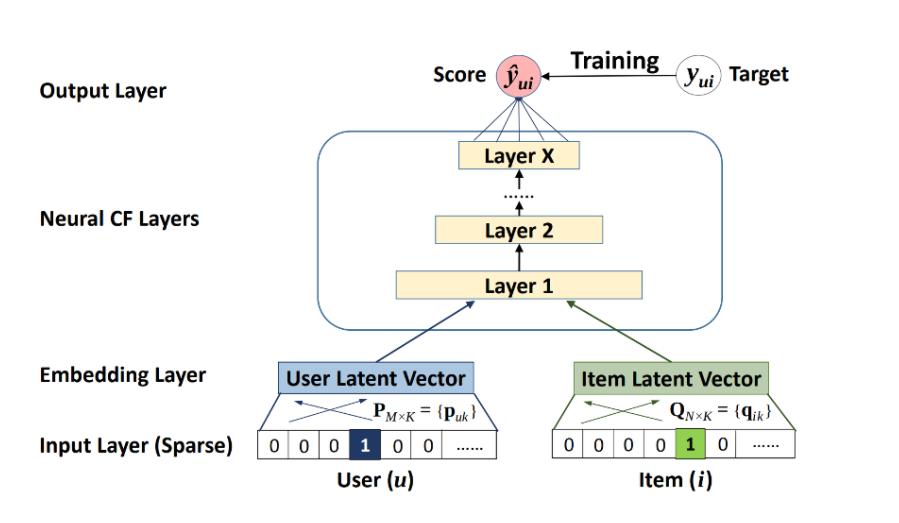


[Source 1](https://arxiv.org/pdf/1708.05031.pdf)

[Source 2](https://arxiv.org/pdf/1703.04247.pdf)

**Wide & Deep** refers to a class of networks that use the output of two parts working in parallel—wide model and deep model—whose outputs are summed to create an interaction probability. The wide model is a generalized linear model of features together with their transforms. The deep model is a Dense Neural Network (DNN), a series of hidden MLP layers, each beginning with a dense embedding of features. Categorical variables are embedded into continuous vector spaces before being fed to the DNN via learned or user-determined embeddings.

# References/ Readings

1. [Paper 1](https://dl.acm.org/doi/pdf/10.1145/170035.170072?casa_token=3i943sYiZPwAAAAA:M7m6HQEn6oUJPIGLf8bx_hKE7-VHgVK4N3ZFxg9LSc50o7bwNMRPB6iAcWnTS-xob7MNQEnlhXKM3w)

2. [Paper 2](https://arxiv.org/pdf/1811.08120.pdf)

